In [1]:
import numpy as np


import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
from sklearn.datasets import fetch_openml
X,y = fetch_openml('mnist_784',version=1,return_X_y=True)

In [3]:
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


In [4]:
type(X)

pandas.core.frame.DataFrame

In [5]:
X = X.to_numpy()

X = X / 255

In [7]:
type(X)

numpy.ndarray

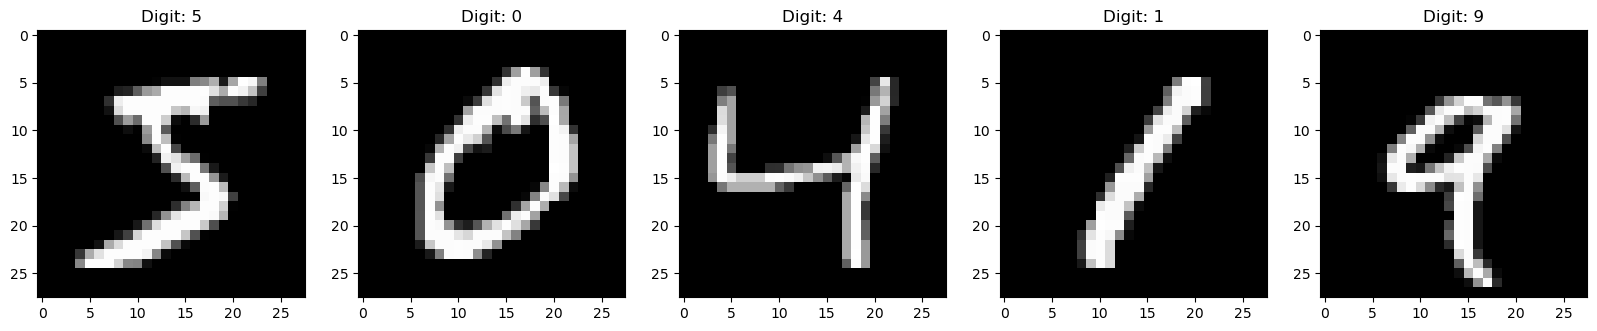

In [9]:
plt.figure(figsize=(20,4))

for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(X[i].reshape(28,28),cmap = plt.cm.gray)
    plt.title("Digit: %i"%int(y.to_numpy()[i]))

In [10]:
np.unique(y)

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [13]:
x1 = X[(y == '0') | (y=='1')]
y1 = y[(y == '0') | (y=='1')]

In [14]:
print(x1.shape)
print(y1.shape)

(14780, 784)
(14780,)


In [15]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size=0.2,random_state=42)

In [16]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(11824, 784)
(11824,)
(2956, 784)
(2956,)


In [17]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

p = Perceptron(max_iter = 1000,random_state = 42)

p.fit(x_train,y_train)

pred_train = p.predict(x_train)
print("Training accuracy: ",accuracy_score(y_train,pred_train))

pred_test = p.predict(x_test)
print("Testing accuracy: ",accuracy_score(y_test,pred_test))

Training accuracy:  1.0
Testing accuracy:  0.9993234100135318


In [19]:
from sklearn.metrics import classification_report

print(classification_report(y_test,pred_test,labels=p.classes_.tolist()))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1402
           1       1.00      1.00      1.00      1554

    accuracy                           1.00      2956
   macro avg       1.00      1.00      1.00      2956
weighted avg       1.00      1.00      1.00      2956



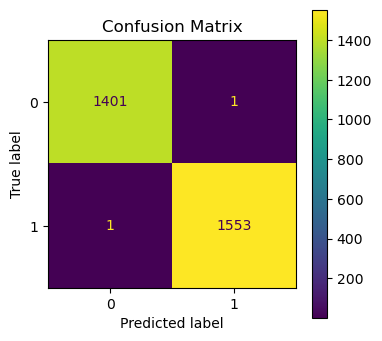

In [21]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm = confusion_matrix(y_test,pred_test,labels=p.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm ,display_labels=p.classes_)

fig,ax = plt.subplots(figsize=(4,4))
ax.set_title('Confusion Matrix')
disp.plot(ax=ax)
plt.show()

In [24]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=1/7,random_state=42)

In [25]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [26]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

p = Perceptron(max_iter = 1000,random_state = 42)

p.fit(x_train,y_train)

pred_train = p.predict(x_train)
print("Training accuracy: ",accuracy_score(y_train,pred_train))

pred_test = p.predict(x_test)
print("Testing accuracy: ",accuracy_score(y_test,pred_test))

Training accuracy:  0.85805
Testing accuracy:  0.846


In [27]:
from sklearn.metrics import classification_report

print(classification_report(y_test,pred_test,labels=p.classes_.tolist()))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       983
           1       0.94      0.93      0.93      1152
           2       0.84      0.86      0.85       967
           3       0.95      0.70      0.80      1034
           4       0.93      0.84      0.88       906
           5       0.85      0.74      0.79       937
           6       0.96      0.91      0.94       961
           7       0.96      0.80      0.88      1055
           8       0.53      0.94      0.68       969
           9       0.82      0.78      0.80      1036

    accuracy                           0.85     10000
   macro avg       0.87      0.85      0.85     10000
weighted avg       0.88      0.85      0.85     10000



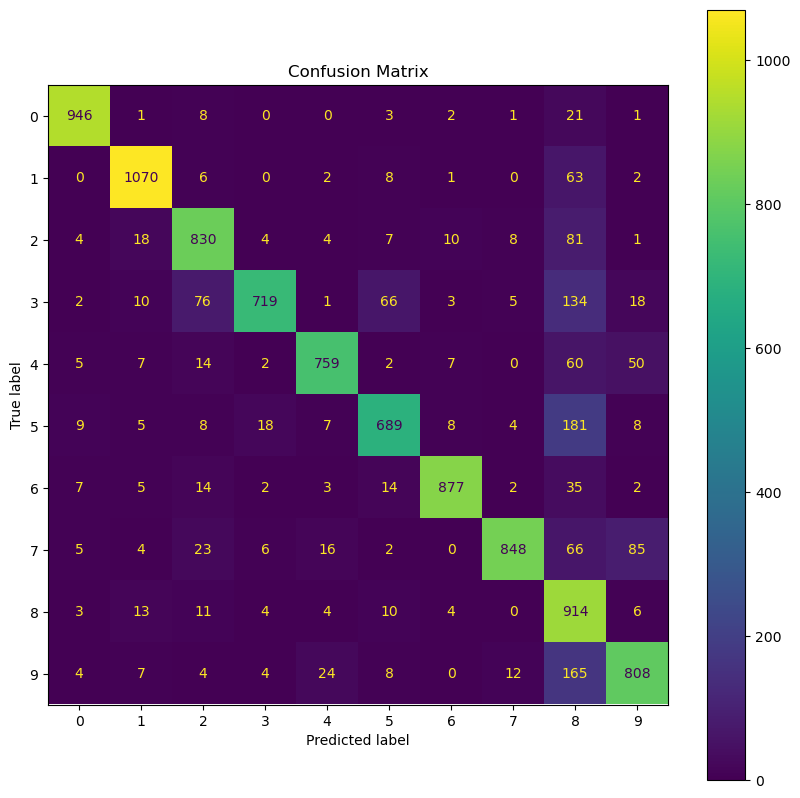

In [28]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm = confusion_matrix(y_test,pred_test,labels=p.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm ,display_labels=p.classes_)

fig,ax = plt.subplots(figsize=(10,10))
ax.set_title('Confusion Matrix')
disp.plot(ax=ax)
plt.show()

In [34]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

mlp = MLPClassifier(hidden_layer_sizes=(100,50),max_iter = 2000,
                    random_state = 42)

mlp.fit(x_train,y_train)

pred_train = mlp.predict(x_train)
print("Training accuracy: ",accuracy_score(y_train,pred_train))

pred_test = mlp.predict(x_test)
print("Testing accuracy: ",accuracy_score(y_test,pred_test))

Training accuracy:  1.0
Testing accuracy:  0.9785


In [31]:
from sklearn.metrics import classification_report

print(classification_report(y_test,pred_test,labels=mlp.classes_.tolist()))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       983
           1       0.99      0.99      0.99      1152
           2       0.97      0.98      0.98       967
           3       0.98      0.98      0.98      1034
           4       0.98      0.98      0.98       906
           5       0.98      0.97      0.98       937
           6       0.97      0.99      0.98       961
           7       0.97      0.98      0.98      1055
           8       0.97      0.96      0.96       969
           9       0.98      0.97      0.97      1036

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



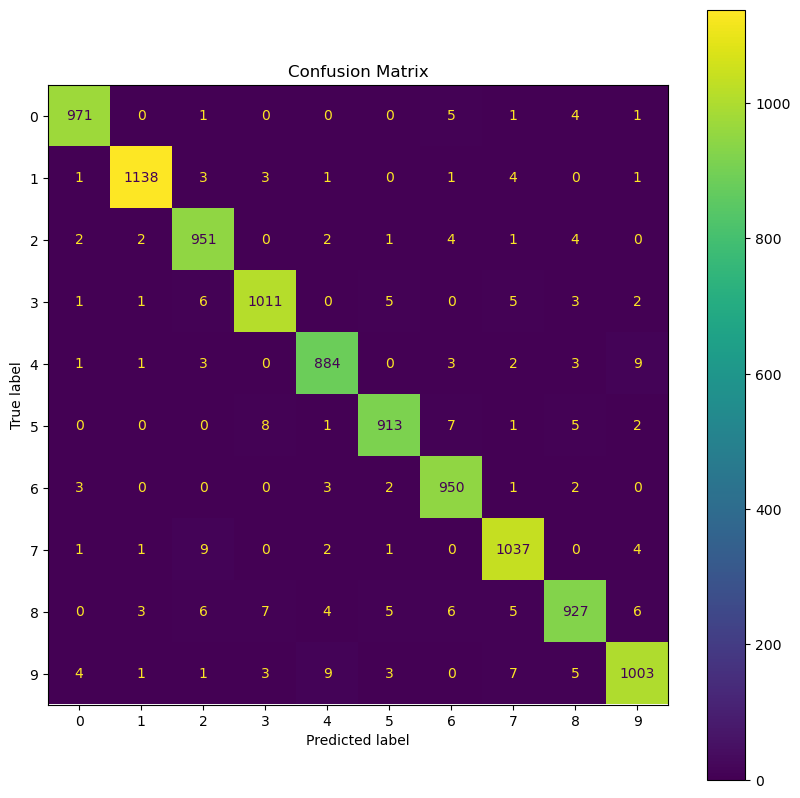

In [32]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm = confusion_matrix(y_test,pred_test,labels=p.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm ,display_labels=mlp.classes_)

fig,ax = plt.subplots(figsize=(10,10))
ax.set_title('Confusion Matrix')
disp.plot(ax=ax)
plt.show()

In [37]:
from PIL import Image
import os

In [45]:
class_names = ['Deer','Eagle','Lion','Panda','Tiger']
class_names_label = {class_name:i for i,class_name in enumerate(class_names)}

nb_classes = len(class_names)
IMAGE_SIZE = (50,50)

In [46]:
def load_data():
    datasets = ["C:/Users/USER/Desktop/Ml/datasets/Animal"]
    
    for dataset in datasets:
        
        images = []
        labels = []
        
        print("Loading {}".format(dataset))
        
        for folder in os.listdir(dataset):#subfolder
            label = class_names_label[folder]
            
            for file in os.listdir(os.path.join(dataset,folder)):
                if file[-3:] in {'jpg','png'}:
                    img_path = os.path.join(os.path.join(dataset,folder),file)
                    
                    image = Image.open(img_path)
                    image = image.convert('RGB')
                    image = image.resize(IMAGE_SIZE)
                    
                    images.append(image)
                    labels.append(label)
        images = np.array([np.array(image) for image in images])
        labels = np.array([np.array(label) for label in labels])    
        
    return images,labels

In [47]:
(X,y) = load_data()

Loading C:/Users/USER/Desktop/Ml/datasets/Animal


In [48]:
print(X.shape)
print(y.shape)

(524, 50, 50, 3)
(524,)


In [50]:
type(X)

numpy.ndarray

In [51]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3,

In [52]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [53]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(419, 50, 50, 3)
(419,)
(105, 50, 50, 3)
(105,)


In [54]:
x_train = x_train/255
x_test = x_test/255

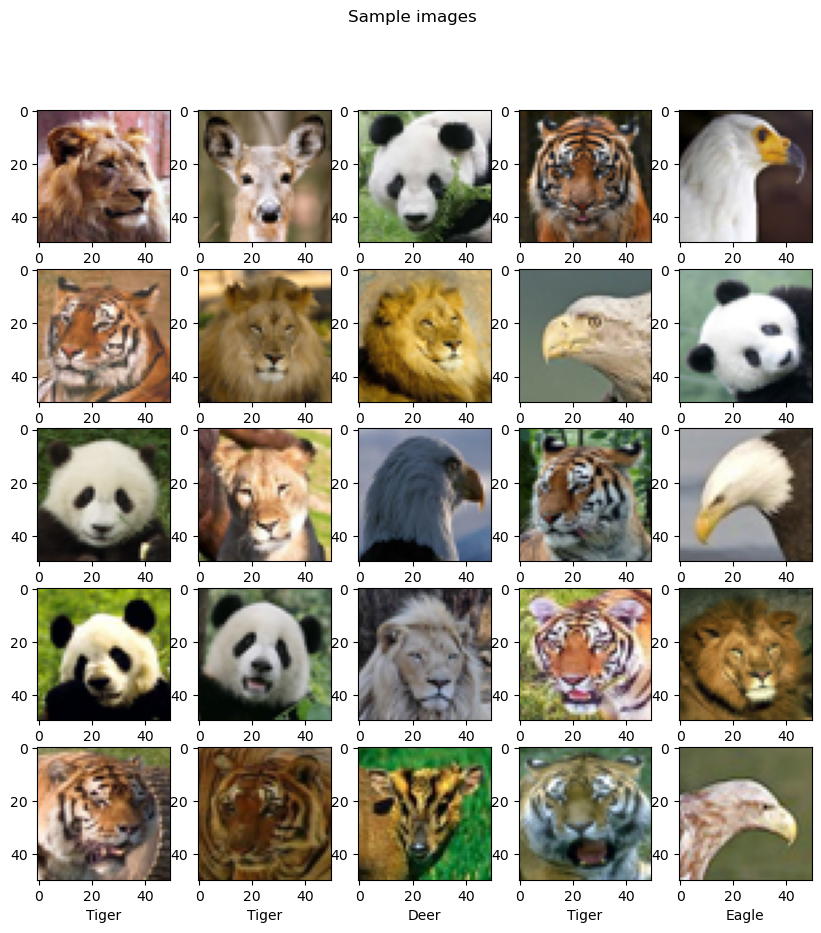

In [57]:
fig = plt.figure(figsize = (10,10))
fig.suptitle('Sample images')
for i in range(25):
    plt.subplot(5,5,i+1)
#   plt.xticks =([])
#   plt.yticks = []
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(class_names[y_train[i]])

In [58]:
x_train_flat = x_train.reshape(-1,50*50*3)
x_test_flat = x_test.reshape(-1,50*50*3)

In [61]:
print(x_train_flat.shape)
print(y_train.shape)
print(x_test_flat.shape)
print(y_test.shape)

(419, 7500)
(419,)
(105, 7500)
(105,)


In [62]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

mlp = MLPClassifier(hidden_layer_sizes=(100,50),max_iter = 2000,
                    random_state = 42)

mlp.fit(x_train_flat,y_train)

pred_train = mlp.predict(x_train_flat)
print("Training accuracy: ",accuracy_score(y_train,pred_train))

pred_test = mlp.predict(x_test_flat)
print("Testing accuracy: ",accuracy_score(y_test,pred_test))

Training accuracy:  1.0
Testing accuracy:  0.7714285714285715


In [63]:
from sklearn.metrics import classification_report

print(classification_report(y_test,pred_test,labels=mlp.classes_.tolist()))

              precision    recall  f1-score   support

           0       0.92      0.76      0.83        29
           1       0.74      0.82      0.78        17
           2       0.57      0.75      0.65        16
           3       0.94      0.89      0.91        18
           4       0.71      0.68      0.69        25

    accuracy                           0.77       105
   macro avg       0.77      0.78      0.77       105
weighted avg       0.79      0.77      0.78       105



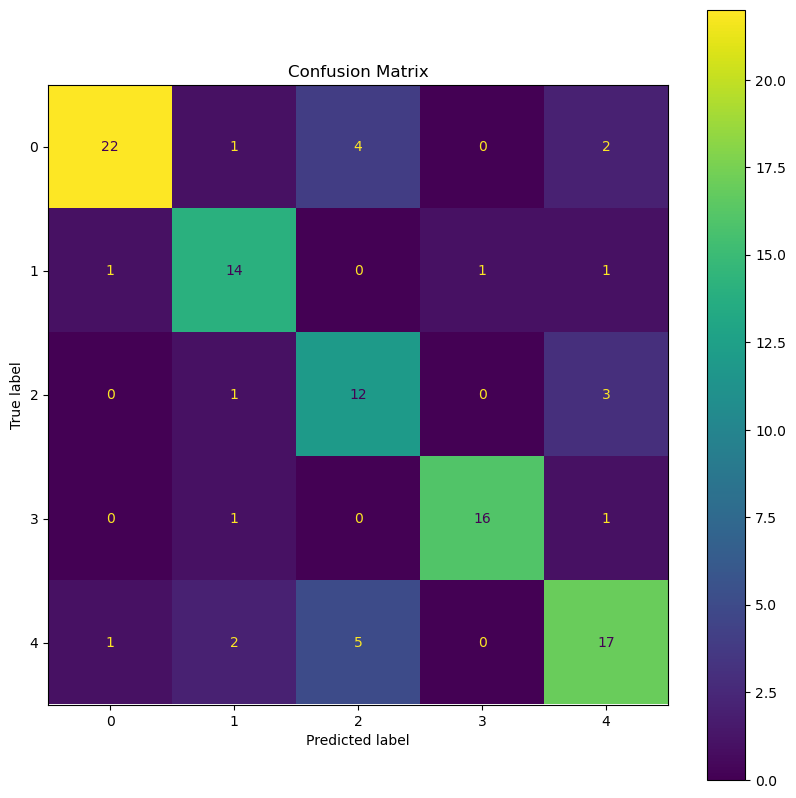

In [64]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm = confusion_matrix(y_test,pred_test,labels=mlp.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm ,display_labels=mlp.classes_)

fig,ax = plt.subplots(figsize=(10,10))
ax.set_title('Confusion Matrix')
disp.plot(ax=ax)
plt.show()

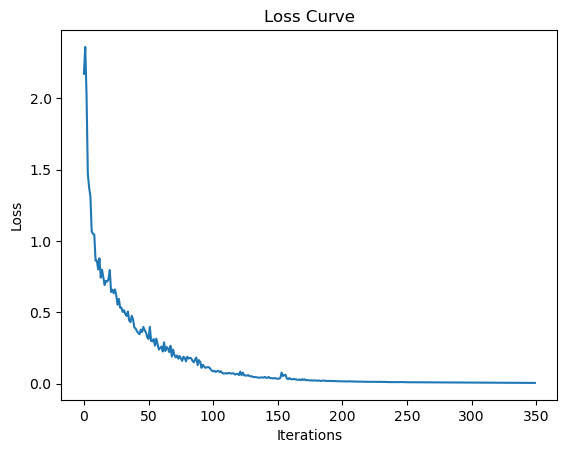

In [65]:
plt.plot(mlp.loss_curve_)
plt.title('Loss Curve')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()